In [1]:
!pip install librosa

In [85]:
import os
import librosa
import librosa.display
import IPython
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
import os, glob, pickle
import seaborn as sns 

# Load audio file

In [3]:
file1 = '../raw_data/Converted_data/_0efYOjQYRc_0.wav'

In [4]:
file2 = '../raw_data/Converted_data/_0efYOjQYRc_1.wav'

In [5]:
file3 = '../raw_data/Converted_data/_0efYOjQYRc_2.wav'

In [6]:
ipd.Audio(file1)

In [7]:
ipd.Audio(file2)

In [8]:
scl1, sr1 = librosa.load(file1)

In [9]:
scl2, sr2 = librosa.load(file2)

In [10]:
scl3, sr3 = librosa.load(file3)

# Plot Spectrogram

In [11]:
frame_size = 2048
hop_size = 512

In [12]:
scale = librosa.stft(scl1,n_fft=frame_size,hop_length = hop_size)

In [13]:
Y_scale = np.abs(scale) **2

In [14]:
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y, 
                             sr=sr, 
                             hop_length=hop_length, 
                             x_axis="time", 
                             y_axis=y_axis)
    plt.colorbar(format="%+2.f")

/home/alexlaurent/.pyenv/versions/3.8.6/envs/backinthessr/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/alexlaurent/.pyenv/versions/3.8.6/envs/backinthessr/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/alexlaurent/.pyenv/versions/3.8.6/envs/backinthessr/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


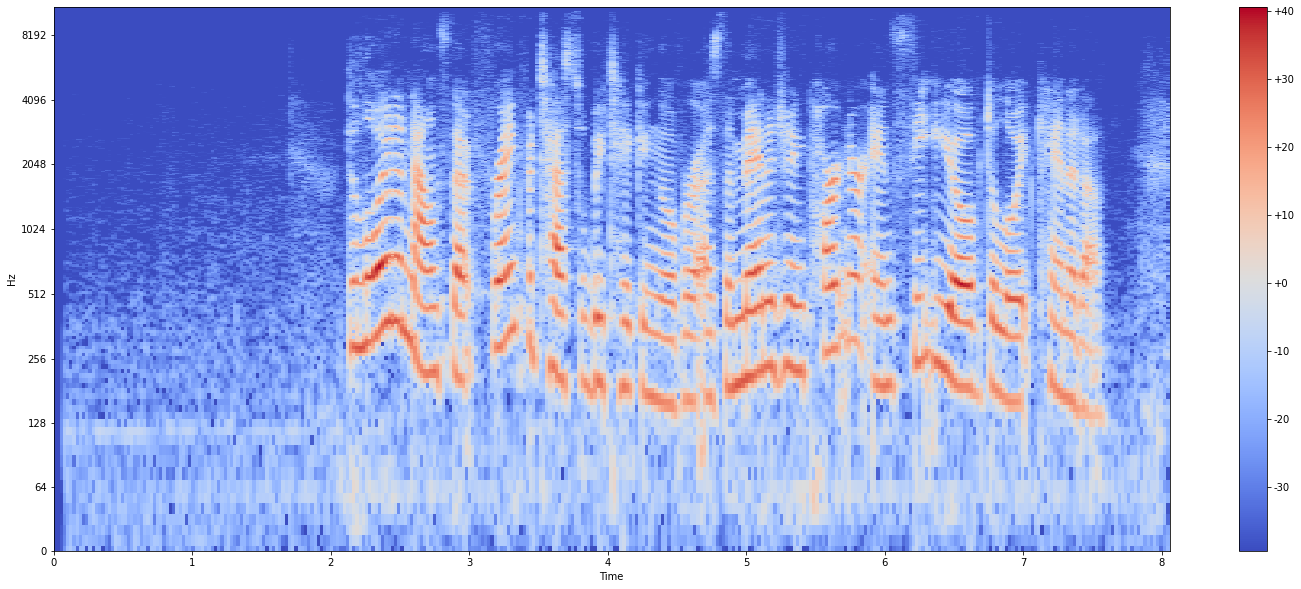

In [15]:
Y_log_scale = librosa.power_to_db(Y_scale)
plot_spectrogram(Y_log_scale, sr1, hop_size, y_axis="log");

# Extract acoustic features

In [16]:
mfcc1 = librosa.feature.mfcc(y=scl1, sr=sr1, n_mfcc=40)

In [74]:
mfcc1.shape

(40, 347)

In [18]:
stft=np.abs(librosa.stft(scl1))
chroma1 = librosa.feature.chroma_stft(S=stft, sr=sr1)

In [19]:
chroma1.shape

(12, 347)

In [20]:
mel1 = librosa.feature.melspectrogram(scl1, sr=sr1)

In [21]:
mel1.shape

(128, 347)

In [22]:
cent1 = librosa.feature.spectral_centroid(y=scl1, sr=sr1)

In [23]:
cent1.shape

(1, 347)

In [25]:
#DataFlair - Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel, centroid):
    y, sr = librosa.load(file_name)
    if chroma:
        stft=np.abs(librosa.stft(y))
        result=np.array([])
    if mfcc:
        mfccs=np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
        result=np.hstack((result, mfccs))
    if chroma:
        chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T,axis=0)
        result=np.hstack((result, chroma))
    if mel:
        mel=np.mean(librosa.feature.melspectrogram(y, sr=sr).T,axis=0)
        result=np.hstack((result, mel))
    if centroid: 
        cent=np.mean(librosa.feature.spectral_centroid(y=y, sr=sr).T, axis=0)
        result=np.hstack((result,cent))
    return result

In [40]:
def load_data(test_size=0.2):
    X=[]
#     y=[]
    for file in glob.glob("../raw_data/testing/*.wav"):
        file_name=os.path.basename(file)
#         emotion=emotions[file_name.split("-")[2]]
#         if emotion not in observed_emotions:
#             continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True,centroid=True)
        X.append(feature)
#         y.append(emotion)
    return X

In [41]:
features = load_data()

In [42]:
import pandas as pd

In [43]:
features = pd.DataFrame(features)

In [44]:
features

,0,1,2,3,4,5,6,7,8,9,...,171,172,173,174,175,176,177,178,179,180
0,-370.763336,117.385376,-14.760429,18.951597,5.680451,-12.443331,-5.766861,-3.961034,-3.812383,1.367417,...,0.000034,0.000019,0.000010,0.000009,0.000008,0.000008,0.000008,2.993560e-06,2.755763e-07,1664.634106
1,-354.958252,129.631622,-16.913763,21.196672,6.308745,-9.615000,-14.357930,-4.910497,-6.218619,5.669564,...,0.000217,0.000165,0.000088,0.000043,0.000022,0.000015,0.000010,3.796931e-06,4.026778e-07,1737.612088
2,-377.557831,136.891769,-16.814795,26.635986,6.330768,-11.535799,-9.577135,-7.663665,-4.181184,0.484371,...,0.000050,0.000031,0.000018,0.000015,0.000011,0.000006,0.000004,1.360738e-06,1.203962e-07,1501.733949
3,-376.503113,143.629150,-17.702625,20.441477,6.378086,-11.414070,-9.195320,-7.850482,-4.100446,0.202239,...,0.000031,0.000016,0.000011,0.000009,0.000009,0.000009,0.000007,2.677492e-06,2.612941e-07,1455.026485
4,-365.846008,143.663971,-23.499050,20.738089,8.051286,-13.091104,-9.692995,-7.342408,-6.225419,0.384705,...,0.000024,0.000011,0.000008,0.000007,0.000006,0.000006,0.000005,1.827539e-06,1.351855e-07,1390.006656
5,-401.232422,146.331619,-19.603872,14.700373,7.259418,-5.725603,-6.763500,-8.491638,-4.019591,-1.120494,...,0.000004,0.000004,0.000003,0.000004,0.000003,0.000003,0.000003,8.331563e-07,5.059633e-08,1324.205129
6,-326.239044,134.343079,-22.127106,-14.795617,4.849355,-27.884539,-11.146154,-8.182047,-12.254960,3.934119,...,0.002460,0.001954,0.001669,0.002002,0.001996,0.001786,0.001021,3.391737e-04,2.774635e-05,1938.852131
7,-329.491119,134.464325,-16.090487,-17.660744,2.564885,-33.599030,-9.839399,-7.038990,-16.156439,3.239803,...,0.002057,0.001921,0.001715,0.001854,0.001632,0.001505,0.001085,3.281539e-04,2.225163e-05,1896.789987
8,-314.888092,135.633224,-18.310734,-19.167225,5.091523,-28.378008,-8.247483,-9.287416,-12.514069,6.222731,...,0.001804,0.001508,0.001700,0.002261,0.002386,0.002218,0.001493,3.883613e-04,2.920011e-05,1919.528971
9,-318.083527,135.650864,-22.880859,-18.118240,5.213539,-28.964867,-9.836656,-3.586202,-13.682009,4.830905,...,0.001423,0.001250,0.001515,0.001838,0.001648,0.001398,0.000860,2.309613e-04,1.834512e-05,1898.312428


In [45]:
features.shape

(28, 181)

In [46]:
#DataFlair - Load the data and extract features for each sound file
# def load_data(test_size=0.2):
#     x,y=[],[]
#     for file in glob.glob("D:\\DataFlair\\ravdess data\\Actor_*\\*.wav"):
#         file_name=os.path.basename(file)
#         emotion=emotions[file_name.split("-")[2]]
#         if emotion not in observed_emotions:
#             continue
#         feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
#         x.append(feature)
#         y.append(emotion)
#     return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [57]:
inputdir= "../raw_data/testing/"

In [87]:
os.listdir(inputdir)

['-3g5yACwYnA_0.wav',
 '-3g5yACwYnA_1.wav',
 '-3g5yACwYnA_10.wav',
 '-3g5yACwYnA_11.wav',
 '-3g5yACwYnA_12.wav',
 '-3g5yACwYnA_13.wav',
 '-3g5yACwYnA_14.wav',
 '-3g5yACwYnA_15.wav',
 '-3g5yACwYnA_16.wav',
 '-3g5yACwYnA_17.wav',
 '-3g5yACwYnA_18.wav',
 '-3g5yACwYnA_2.wav',
 '-3g5yACwYnA_3.wav',
 '-3g5yACwYnA_4.wav',
 '-3g5yACwYnA_5.wav',
 '-3g5yACwYnA_6.wav',
 '-3g5yACwYnA_7.wav',
 '-3g5yACwYnA_8.wav',
 '-3g5yACwYnA_9.wav',
 '-3nNcZdcdvU_0.wav',
 '-3nNcZdcdvU_1.wav',
 '-3nNcZdcdvU_2.wav',
 '-3nNcZdcdvU_3.wav',
 '-3nNcZdcdvU_4.wav',
 '-3nNcZdcdvU_5.wav',
 '03X1FwF6udc_0.wav',
 '03X1FwF6udc_1.wav',
 '03X1FwF6udc_10.wav',
 '03X1FwF6udc_11.wav',
 '03X1FwF6udc_12.wav',
 '03X1FwF6udc_13.wav',
 '03X1FwF6udc_14.wav',
 '03X1FwF6udc_15.wav',
 '03X1FwF6udc_16.wav',
 '03X1FwF6udc_17.wav',
 '03X1FwF6udc_18.wav',
 '03X1FwF6udc_19.wav',
 '03X1FwF6udc_2.wav',
 '03X1FwF6udc_20.wav',
 '03X1FwF6udc_21.wav',
 '03X1FwF6udc_22.wav',
 '03X1FwF6udc_23.wav',
 '03X1FwF6udc_24.wav',
 '03X1FwF6udc_25.wav',
 '03X1F

In [88]:
 duration = []
for wav in os.listdir(inputdir):
    y, sr = librosa.load(f'../raw_data/testing/{wav}')
    duration.append(librosa.get_duration(y,sr))    

KeyboardInterrupt: 

<AxesSubplot:ylabel='Count'>

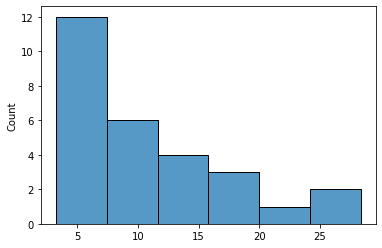

In [86]:
sns.histplot(duration)